In [5]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plots
import seaborn as sns #for plots

#Setting up asethetics: how the answers are printed, I just want upto 4 decimal points.
pd.set_option("display.float_format", lambda x: "%.4f" % x)
np.set_printoptions(precision=4, suppress=True)
def print(*args):
    __builtins__.print(*("%.3f" % a if isinstance(a, float) else a
                         for a in args))

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Reading the Data on Hard drive

In [7]:
wine_data = pd.read_csv("wine.data.csv", header=0)
wine_data.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline,Number of bottles
0,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065,23
1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050,123
2,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185,137
3,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480,109
4,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735,130


In [8]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0000,13.0006,0.8118,11.0300,12.3625,13.0500,13.6775,14.8300
Malic Acid,178.0000,2.3363,1.1171,0.7400,1.6025,1.8650,3.0825,5.8000
Ash,178.0000,2.3665,0.2743,1.3600,2.2100,2.3600,2.5575,3.2300
Alcalinity of ash,178.0000,19.4949,3.3396,10.6000,17.2000,19.5000,21.5000,30.0000
Magnesium,178.0000,99.7416,14.2825,70.0000,88.0000,98.0000,107.0000,162.0000
Total Phenols,178.0000,2.2951,0.6259,0.9800,1.7425,2.3550,2.8000,3.8800
Flavanoids,178.0000,2.0293,0.9989,0.3400,1.2050,2.1350,2.8750,5.0800
Nonflavanoid phenols,178.0000,0.3619,0.1245,0.1300,0.2700,0.3400,0.4375,0.6600
Proanthocyanins,178.0000,1.5909,0.5724,0.4100,1.2500,1.5550,1.9500,3.5800
Color Intensity,178.0000,5.0581,2.3183,1.2800,3.2200,4.6900,6.2000,13.0000


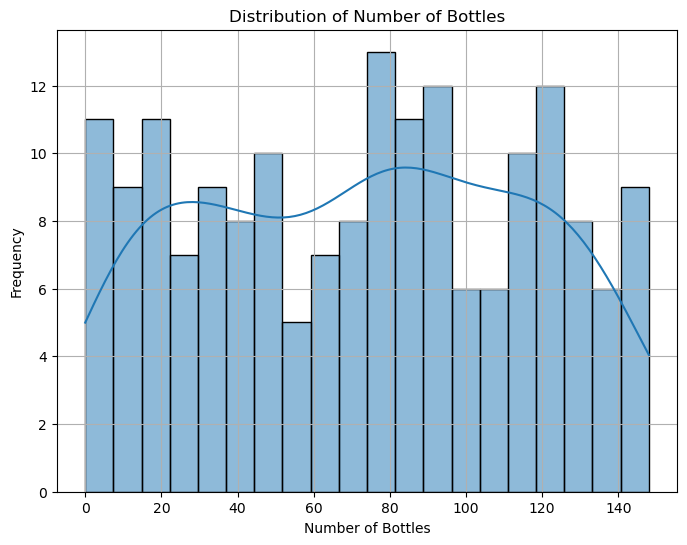

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(wine_data['Number of bottles'], kde=True, bins=20)
plt.title('Distribution of Number of Bottles')
plt.xlabel('Number of Bottles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 1 Feature preprocessing and standardization



In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = wine_data.columns[:-1]  # Exclude 'Number of bottles'
wine_data_scaled = scaler.fit_transform(wine_data[features])
wine_data_scaled = pd.DataFrame(wine_data_scaled, columns=features)

In [16]:
# Create the correlation matrix
corr = wine_data.corr(method = 'pearson')
corr.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline,Number of bottles
Alcohol,1.0000,0.0944,0.2115,-0.3102,0.2708,0.2891,0.2368,-0.1559,0.1367,0.5464,-0.0717,0.0723,0.6437,0.0542
Malic Acid,0.0944,1.0000,0.1640,0.2885,-0.0546,-0.3352,-0.4110,0.2930,-0.2207,0.2490,-0.5613,-0.3687,-0.1920,0.0516
Ash,0.2115,0.1640,1.0000,0.4434,0.2866,0.1290,0.1151,0.1862,0.0097,0.2589,-0.0747,0.0039,0.2236,0.0707
Alcalinity of ash,-0.3102,0.2885,0.4434,1.0000,-0.0833,-0.3211,-0.3514,0.3619,-0.1973,0.0187,-0.2740,-0.2768,-0.4406,0.0633
Magnesium,0.2708,-0.0546,0.2866,-0.0833,1.0000,0.2144,0.1958,-0.2563,0.2364,0.2000,0.0554,0.0660,0.3934,-0.1448


#### 2. Feature Selection - Recursive Feature Elimination (RFE)


In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
rfe = RFE(estimator=linear_reg, n_features_to_select=len(features)//2)
rfe.fit(wine_data_scaled, wine_data["Number of bottles"])
selected_features_rfe = features[rfe.support_]
selected_features_rfe

Index(['Alcohol', 'Magnesium', 'Total Phenols', 'Flavanoids',
       'Proanthocyanins', 'OD280/OD315 of diluted wines'],
      dtype='object')

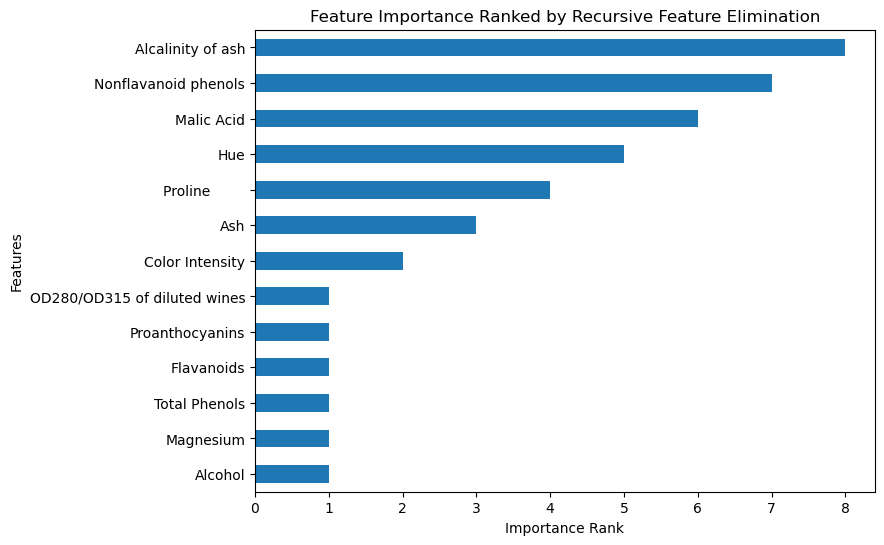

In [18]:
import matplotlib.pyplot as plt

feature_ranks = pd.Series(rfe.ranking_, index=features)

sorted_ranks = feature_ranks.sort_values()
plt.figure(figsize=(8, 6))
sorted_ranks.plot(kind='barh')
plt.title('Feature Importance Ranked by Recursive Feature Elimination')
plt.xlabel('Importance Rank')
plt.ylabel('Features')
plt.show()

#### 3. Principal Component Analysis (PCA)

In [19]:
from sklearn.decomposition import PCA

data_for_pca = wine_data_scaled[selected_features_rfe]
pca = PCA()
pca.fit(data_for_pca)
explained_variance = pca.explained_variance_ratio_
pca_reduced_data = pca.transform(data_for_pca)[:, :3]

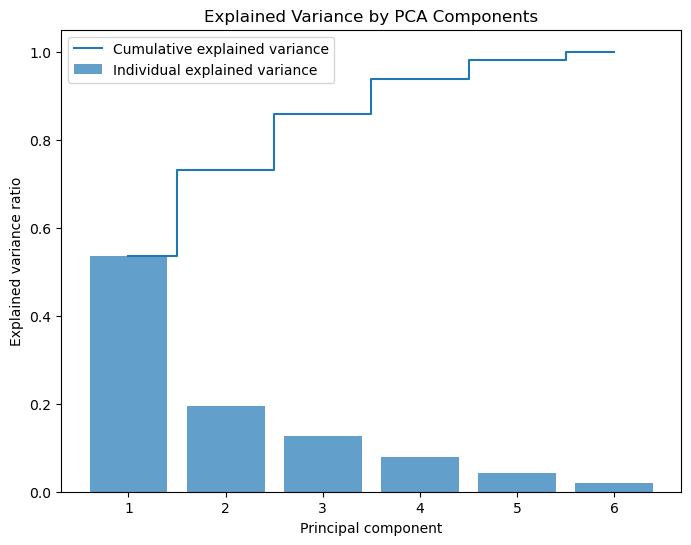

In [20]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Explained Variance by PCA Components')
plt.legend(loc='best')
plt.show()

#### 4. Clustering - K-Means, Agglomerative, Gaussian Mixture Model


In [21]:
# K-Means
from sklearn.cluster import KMeans

def calculate_kmeans_inertia(pca_reduced_data, k_range):
    inertias = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Agglomerative
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pca_reduced_data, method='ward')

# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

def calculate_gmm_scores(data, k_range):
    aics, bics = [], []
    for k in k_range:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        aics.append(gmm.aic(data))
        bics.append(gmm.bic(data))
    return aics, bics


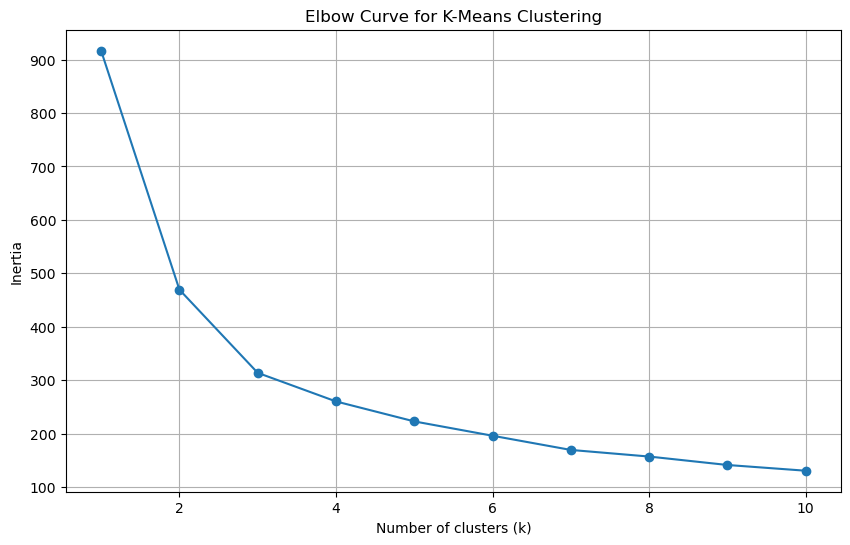

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_range = range(1, 11)  
inertias = []  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_reduced_data) 
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering')
plt.grid(True)
plt.show()

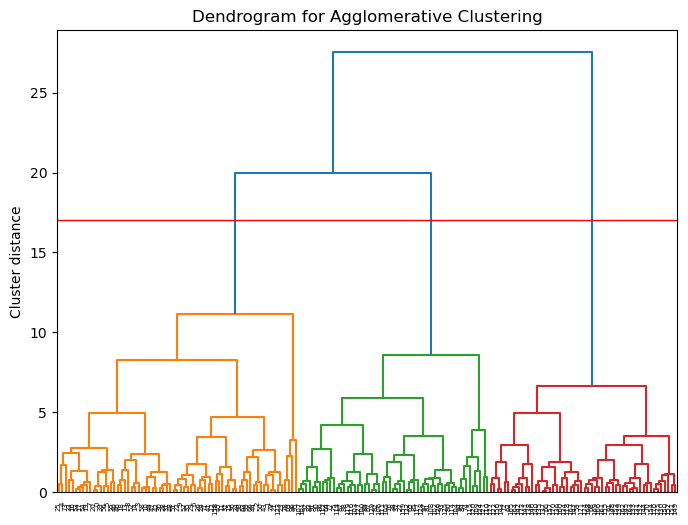

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(8, 6))
dendrogram(linked, orientation='top', labels=np.array(wine_data.index), distance_sort='descending', show_leaf_counts=True)
plt.axhline(y=17, color='r', linestyle='-', linewidth=1)
plt.title('Dendrogram for Agglomerative Clustering')
#plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.show()

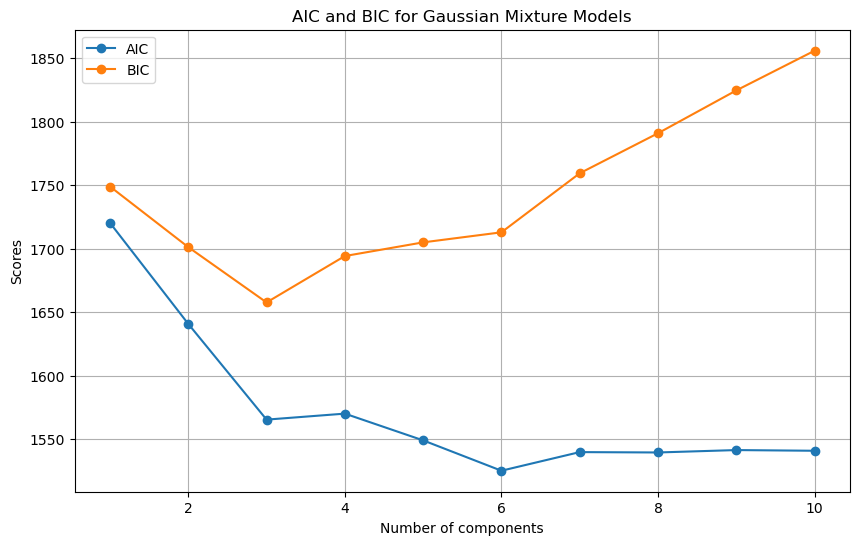

In [24]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

k_range = range(1, 11)
aics, bics = [], []  

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(pca_reduced_data)  
    aics.append(gmm.aic(pca_reduced_data))
    bics.append(gmm.bic(pca_reduced_data))

plt.figure(figsize=(10, 6))
plt.plot(k_range, aics, label='AIC', marker='o')
plt.plot(k_range, bics, label='BIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Scores')
plt.title('AIC and BIC for Gaussian Mixture Models')
plt.legend()
plt.grid(True)
plt.show()


## Count Variable Regressions


In [25]:
X = wine_data.drop('Number of bottles',axis=1)
y = wine_data['Number of bottles']

In [26]:
import statsmodels.api as sm

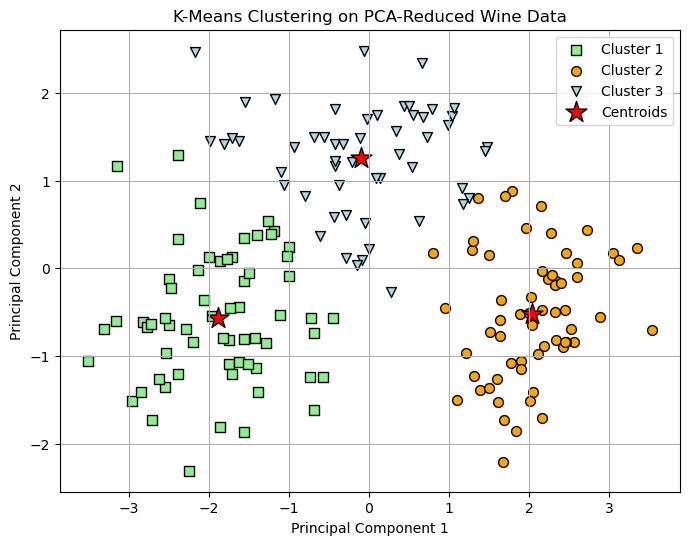

In [41]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(pca_reduced_data)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_reduced_data[y_kmeans == 0, 0], pca_reduced_data[y_kmeans == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(pca_reduced_data[y_kmeans == 1, 0], pca_reduced_data[y_kmeans == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(pca_reduced_data[y_kmeans == 2, 0], pca_reduced_data[y_kmeans == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Wine Data')
plt.legend(scatterpoints=1)
plt.show()

In [27]:
nb2 = sm.GLM(y, X,family=sm.families.NegativeBinomial()).fit()
print(nb2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Number of bottles   No. Observations:                  178
Model:                            GLM   Df Residuals:                      165
Model Family:        NegativeBinomial   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -939.63
Date:                Wed, 15 May 2024   Deviance:                       114.08
Time:                        00:18:35   Pearson chi2:                     65.0
No. Iterations:                     8   Pseudo R-squ. (CS):            0.02841
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Alcohol         

C:\Users\HP\anaconda\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
